# Why estimate $f$?

## Prediction

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\hat{f}$ ("eff hat").

## Why estimate $f$?

There are two main reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other

In [2]:
%pwd

'/home/emilyjyj/uclax-data-science/01-iris-03-why-estimate-f'

### What does `pwd` tell us? What does this mean in the context of a Jupyter Notebook? Why would it be important to think about this before we load a csv file?

pwd tells us the current working directory. In the context of a Jupyter Notebook, it means the "path" that we are sitting in. Because a Jupyter Notebook is used to excute code, it may or may not have access to a file system. Therefore it is important to make sure we are at the correct working directory to load a specific csv file we want.

In [3]:
%cd ..

/home/emilyjyj/uclax-data-science


In [4]:
%ls

00-introduction/              01-iris-03-why-estimate-f/
01-iris-01-introduction/      02-iris-04-statistical-learning/
01-iris-02-numerical-python/  data/


## The Iris Dataset

Let us consider the Iris dataset.

In [5]:
%ls 01-iris-02-numerical-python/

02-ipython-magic.ipynb  03-the-python-numerical-stack.ipynb  data/  src/


In [6]:
%ls 01-iris-02-numerical-python/data

iris.csv  petal_width_prediction_1_var.npy


In [7]:
%ls

00-introduction/              01-iris-03-why-estimate-f/
01-iris-01-introduction/      02-iris-04-statistical-learning/
01-iris-02-numerical-python/  data/


In [8]:
%mkdir -p 01-iris-03-why-estimate-f/data

### Copy (`cp`) the data into this project (`01-iris-03-why-estimate-f`) into a folder called `data`

In [9]:
%cp 01-iris-02-numerical-python/data/iris.csv 01-iris-03-why-estimate-f/data

In [10]:
%ls 01-iris-03-why-estimate-f/data

iris.csv  petal_width_prediction_1_var.npy


### Find the iris data and update the variable below

In [11]:
%cd 01-iris-03-why-estimate-f/

/home/emilyjyj/uclax-data-science/01-iris-03-why-estimate-f


In [12]:
pwd

'/home/emilyjyj/uclax-data-science/01-iris-03-why-estimate-f'

In [13]:
ls

04-why-estimate-f-prediction.ipynb  06-multicollinearity.ipynb         data/
05-the-train-test-split.ipynb       07-why-estimate-f-inference.ipynb


In [14]:
IRIS_DATA_LOCATION ='data/iris.csv'

In [15]:
### v--- SHHH, THERE'S A SECRET TEST HERE


In [16]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

### What library did we use to load the csv? What does the argument `index_col=0` do?

We used Pandas library. index_col=0 sets the first column as the index.

In [17]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_df.sample()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5


<Figure size 1440x720 with 0 Axes>

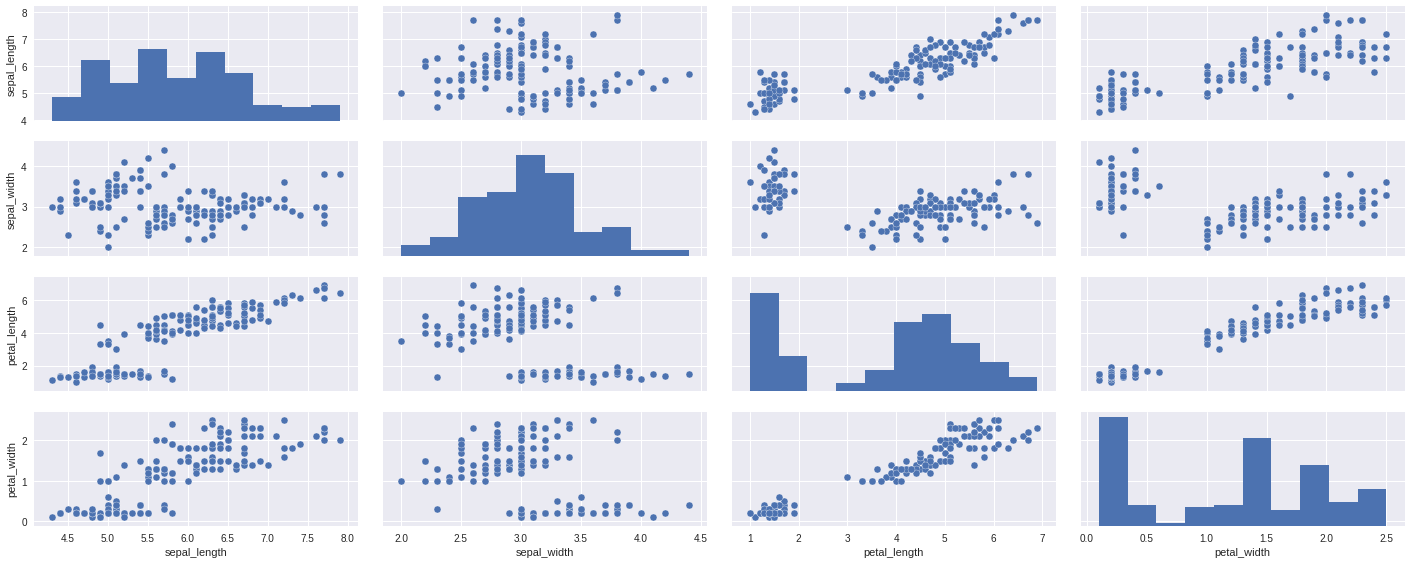

In [20]:
plt.figure(1, (20,10))

sns.pairplot(iris_df, size=2, aspect=2.5)

Having a look at the pair plot, we might say that we are able to predict petal width if we know petal length.

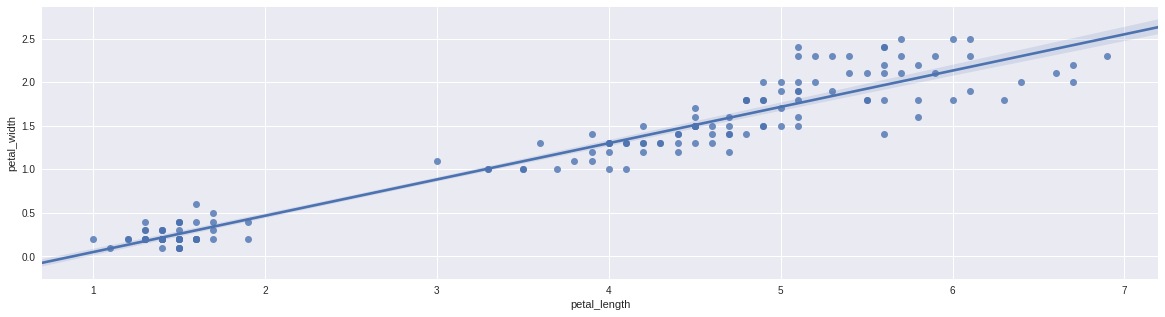

In [21]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

## Linear Regression

We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

### Build a Simple Regression Model

In [22]:
from patsy import dmatrices

target, features = dmatrices("petal_width ~ 1 + petal_length", iris_df)

In [23]:
target.shape, features.shape

((150, 1), (150, 2))

In [24]:
features[:5]

array([[ 1. ,  1.4],
       [ 1. ,  1.4],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  1.4]])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
linear_regression_model.coef_

array([[ 0.        ,  0.41641913]])

## Plot the Results

Having prepared the regression model, we use it to make predictions.

We then plot the predictions versus the actual values.


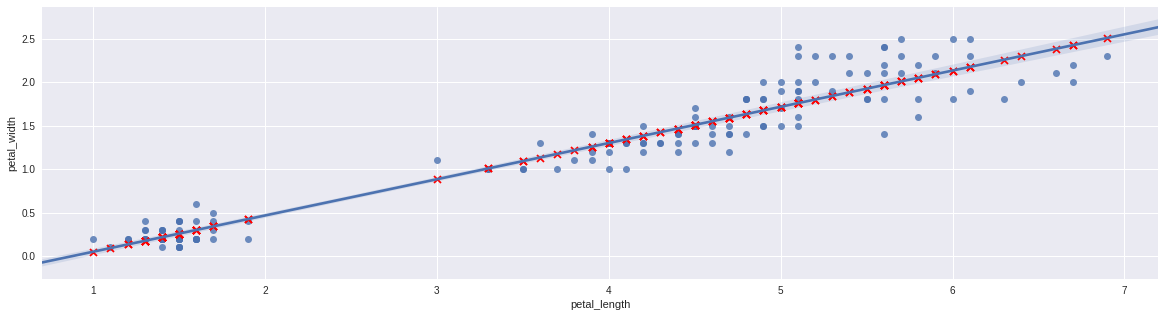

In [28]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

predictions = linear_regression_model.predict(features)
plt.scatter(iris_df.petal_length, predictions, marker='x', color='red')

### What does this plot show us? 

It shows petal_width and petal_length have positive relationship.